In [0]:
import spacy

In [0]:
nlp = spacy.load('en')

In [0]:
# NLP of Walmart's data


In [0]:
sample_text=u'''Walmart this morning unveiled new store of the future and test grounds for emerging technologies, including AI-enabled cameras and interactive displays.The store, a working concept called the Intelligent Retail Lab — or “IRL” for short — operates out of a Walmart Neighborhood Market in Levittown, N.Y.. The store is open to customers and is one of Walmart’s busiest Neighborhood Market stores, containing more than 30,000 items, the retailer says, which allows it to test out technology in a real-world environment.Similar to Amazon Go’s convenience stores, the store has a suite of cameras mounted in the ceiling.But unlike Amazon Go, which is a grab-and-go store with smaller square footage, Walmart’s IRL spans 50,000 square feet of retail space and is staffed by more than 100 employees.
Plus, in Walmart’s case, these AI-powered cameras are not being used to determine which items customers are buying in order to automatically charge them. It still has traditional checkout stations. Instead, the cameras will monitor inventory levels to determine, for example, if staff needs to bring out more meat from the back-room refrigerators to restock the shelves, or if some fresh items have been sitting too long on the shelf and need to be pulled.'''

In [0]:
process = nlp(sample_text)

In [6]:
print(process)

Walmart this morning unveiled new store of the future and test grounds for emerging technologies, including AI-enabled cameras and interactive displays.The store, a working concept called the Intelligent Retail Lab — or “IRL” for short — operates out of a Walmart Neighborhood Market in Levittown, N.Y.. The store is open to customers and is one of Walmart’s busiest Neighborhood Market stores, containing more than 30,000 items, the retailer says, which allows it to test out technology in a real-world environment.Similar to Amazon Go’s convenience stores, the store has a suite of cameras mounted in the ceiling.But unlike Amazon Go, which is a grab-and-go store with smaller square footage, Walmart’s IRL spans 50,000 square feet of retail space and is staffed by more than 100 employees.
Plus, in Walmart’s case, these AI-powered cameras are not being used to determine which items customers are buying in order to automatically charge them. It still has traditional checkout stations. Instead, 

In [9]:
seprate_sentences = list(process.sents)
for v, sent in enumerate(seprate_sentences):
  print("%s. %s\n"%(v+1,sent))

1. Walmart this morning unveiled new store of the future and test grounds for emerging technologies, including AI-enabled cameras and interactive displays.

2. The store, a working concept called the Intelligent Retail Lab — or “IRL” for short — operates out of a Walmart Neighborhood Market in Levittown, N.Y..

3. The store is open to customers and is one of Walmart’s busiest Neighborhood Market stores, containing more than 30,000 items, the retailer says, which allows it to test out technology in a real-world environment.

4. Similar to Amazon Go’s convenience stores, the store has a suite of cameras mounted in the ceiling.

5. But unlike Amazon Go, which is a grab-and-go store with smaller square footage, Walmart’s IRL spans 50,000 square feet of retail space and is staffed by more than 100 employees.


6. Plus, in Walmart’s case, these AI-powered cameras are not being used to determine which items customers are buying in order to automatically charge them.

7. It still has tradition

In [10]:
first_sentence = seprate_sentences[0]
for word in first_sentence:
  print(word.text)

Walmart
this
morning
unveiled
new
store
of
the
future
and
test
grounds
for
emerging
technologies
,
including
AI
-
enabled
cameras
and
interactive
displays
.


In [11]:
first_word = process[0]
print(first_word)

Walmart


In [0]:
# Part of Speech tags
# https://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/

In [16]:
import pandas as pd
token_text = [token.text for token in first_sentence]
token_pos = [token.pos for token in first_sentence]

df = pd.DataFrame(zip(token_text,token_pos),columns = ['Words','Figures-of-Speech']) 
df

,Words,Figures-of-Speech
0,Walmart,96
1,this,90
2,morning,92
3,unveiled,100
4,new,84
5,store,92
6,of,85
7,the,90
8,future,92
9,and,89


In [0]:
# LEMMATIZATION - Assigning the base forms of the words

In [26]:
token_lem = [token.lemma_ for token in first_sentence]
token_shape = [token.shape_ for token in first_sentence]

df_2 = pd.DataFrame(zip(token_text,token_lem,token_shape),columns = ['Words','Lemma','shape'])
df_2

,Words,Lemma,shape
0,Walmart,Walmart,Xxxxx
1,this,this,xxxx
2,morning,morning,xxxx
3,unveiled,unveil,xxxx
4,new,new,xxx
5,store,store,xxxx
6,of,of,xx
7,the,the,xxx
8,future,future,xxxx
9,and,and,xxx


In [0]:
# Finding Syntactic Dependencies

In [0]:
from spacy import displacy

In [0]:
new_sent = process[6]

In [0]:
displacy.render(new_sent, style="dep", jupyter=True, options={'distance' : 140})

In [40]:
# Named Entities - Geting Proper nouns from the paragraph
displacy.render(process,style="ent",jupyter=True)

In [0]:
org = [ent for ent in process.ents if ent.label_ == 'ORG']

In [42]:
for ent in org:
  print(ent)

IRL
Neighborhood Market
Amazon Go’s
Walmart’s IRL


In [47]:
# Word Embeddings (Word Vectors)
walmartNouns=[word for word in process if (word.pos_.startswith('N') or word.pos_.startswith('PROPN'))]
walmartvectors = [word.vector for word in walmartNouns]
walmartlabels = [word.text for word in walmartNouns]
walmartvectors
walmartlabels

['Walmart',
 'morning',
 'store',
 'future',
 'test',
 'grounds',
 'technologies',
 'AI',
 'cameras',
 'displays',
 'store',
 'concept',
 'Intelligent',
 'Retail',
 'Lab',
 '—',
 '“',
 'IRL',
 '—',
 'Walmart',
 'Neighborhood',
 'Market',
 'Levittown',
 'N.Y',
 'store',
 'customers',
 'one',
 'Walmart',
 '’s',
 'Neighborhood',
 'Market',
 'stores',
 '30,000',
 'items',
 'retailer',
 'technology',
 'world',
 'environment',
 'Amazon',
 'Go',
 '’s',
 'convenience',
 'stores',
 'store',
 'suite',
 'cameras',
 'ceiling',
 'Amazon',
 'Go',
 'store',
 'footage',
 'Walmart',
 '’s',
 'IRL',
 '50,000',
 'feet',
 'space',
 '100',
 'employees',
 'Walmart',
 '’s',
 'case',
 'AI',
 'cameras',
 'items',
 'customers',
 'order',
 'checkout',
 'stations',
 'cameras',
 'inventory',
 'levels',
 'example',
 'staff',
 'meat',
 'room',
 'refrigerators',
 'shelves',
 'items',
 'shelf']

In [58]:


!pip show sklearn

Name: sklearn
Version: 0.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://pypi.python.org/pypi/scikit-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: None
Location: /usr/local/lib/python3.6/dist-packages
Requires: scikit-learn
Required-by: 


In [59]:
!pip install sklearn

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
lsa = TruncatedSVD(n_components = 2)

In [0]:
lsaOut = lsa.fit_transform(walmartvectors)

In [0]:
#lsa, lsaOut

In [0]:
import matplotlib.pyplot as plt

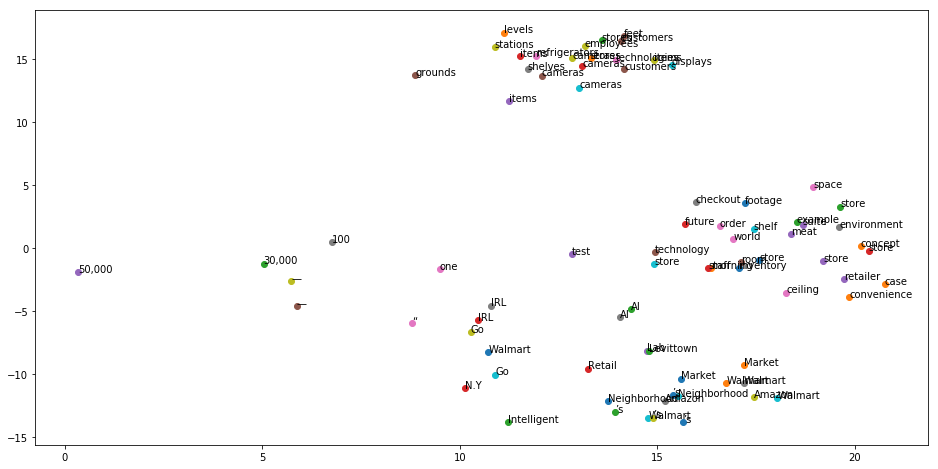

In [77]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8



xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(walmartlabels[i], (xs[i], ys[i]))

In [0]:
# Gensim

In [0]:
from gensim.summarization import *

In [80]:
print('Summary:\n')
print(summarize(sample_text))

Summary:

The store is open to customers and is one of Walmart’s busiest Neighborhood Market stores, containing more than 30,000 items, the retailer says, which allows it to test out technology in a real-world environment.Similar to Amazon Go’s convenience stores, the store has a suite of cameras mounted in the ceiling.But unlike Amazon Go, which is a grab-and-go store with smaller square footage, Walmart’s IRL spans 50,000 square feet of retail space and is staffed by more than 100 employees.


In [0]:
#TextBlob - Performing sentiment analysis


In [0]:
from textblob import TextBlob

In [0]:
first = "My name is Vraj and this is my first try on Natural Language procesing and Sentiment Analysis"

In [0]:
first_review = TextBlob(first)

In [90]:
print (round(TextBlob(first).sentiment.polarity,3))

0.175


In [98]:
Walmart_1 = str(seprate_sentences)
Walmart_1


'[Walmart this morning unveiled new store of the future and test grounds for emerging technologies, including AI-enabled cameras and interactive displays., The store, a working concept called the Intelligent Retail Lab — or “IRL” for short — operates out of a Walmart Neighborhood Market in Levittown, N.Y.., The store is open to customers and is one of Walmart’s busiest Neighborhood Market stores, containing more than 30,000 items, the retailer says, which allows it to test out technology in a real-world environment., Similar to Amazon Go’s convenience stores, the store has a suite of cameras mounted in the ceiling., But unlike Amazon Go, which is a grab-and-go store with smaller square footage, Walmart’s IRL spans 50,000 square feet of retail space and is staffed by more than 100 employees.\n, Plus, in Walmart’s case, these AI-powered cameras are not being used to determine which items customers are buying in order to automatically charge them., It still has traditional checkout statio

In [0]:
review_1 = TextBlob(Walmart_1)

In [100]:
print(TextBlob(Walmart_1).sentiment.polarity)

0.20664335664335665
